In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('diabetes.csv')

data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())

In [3]:
data.shape

(768, 9)

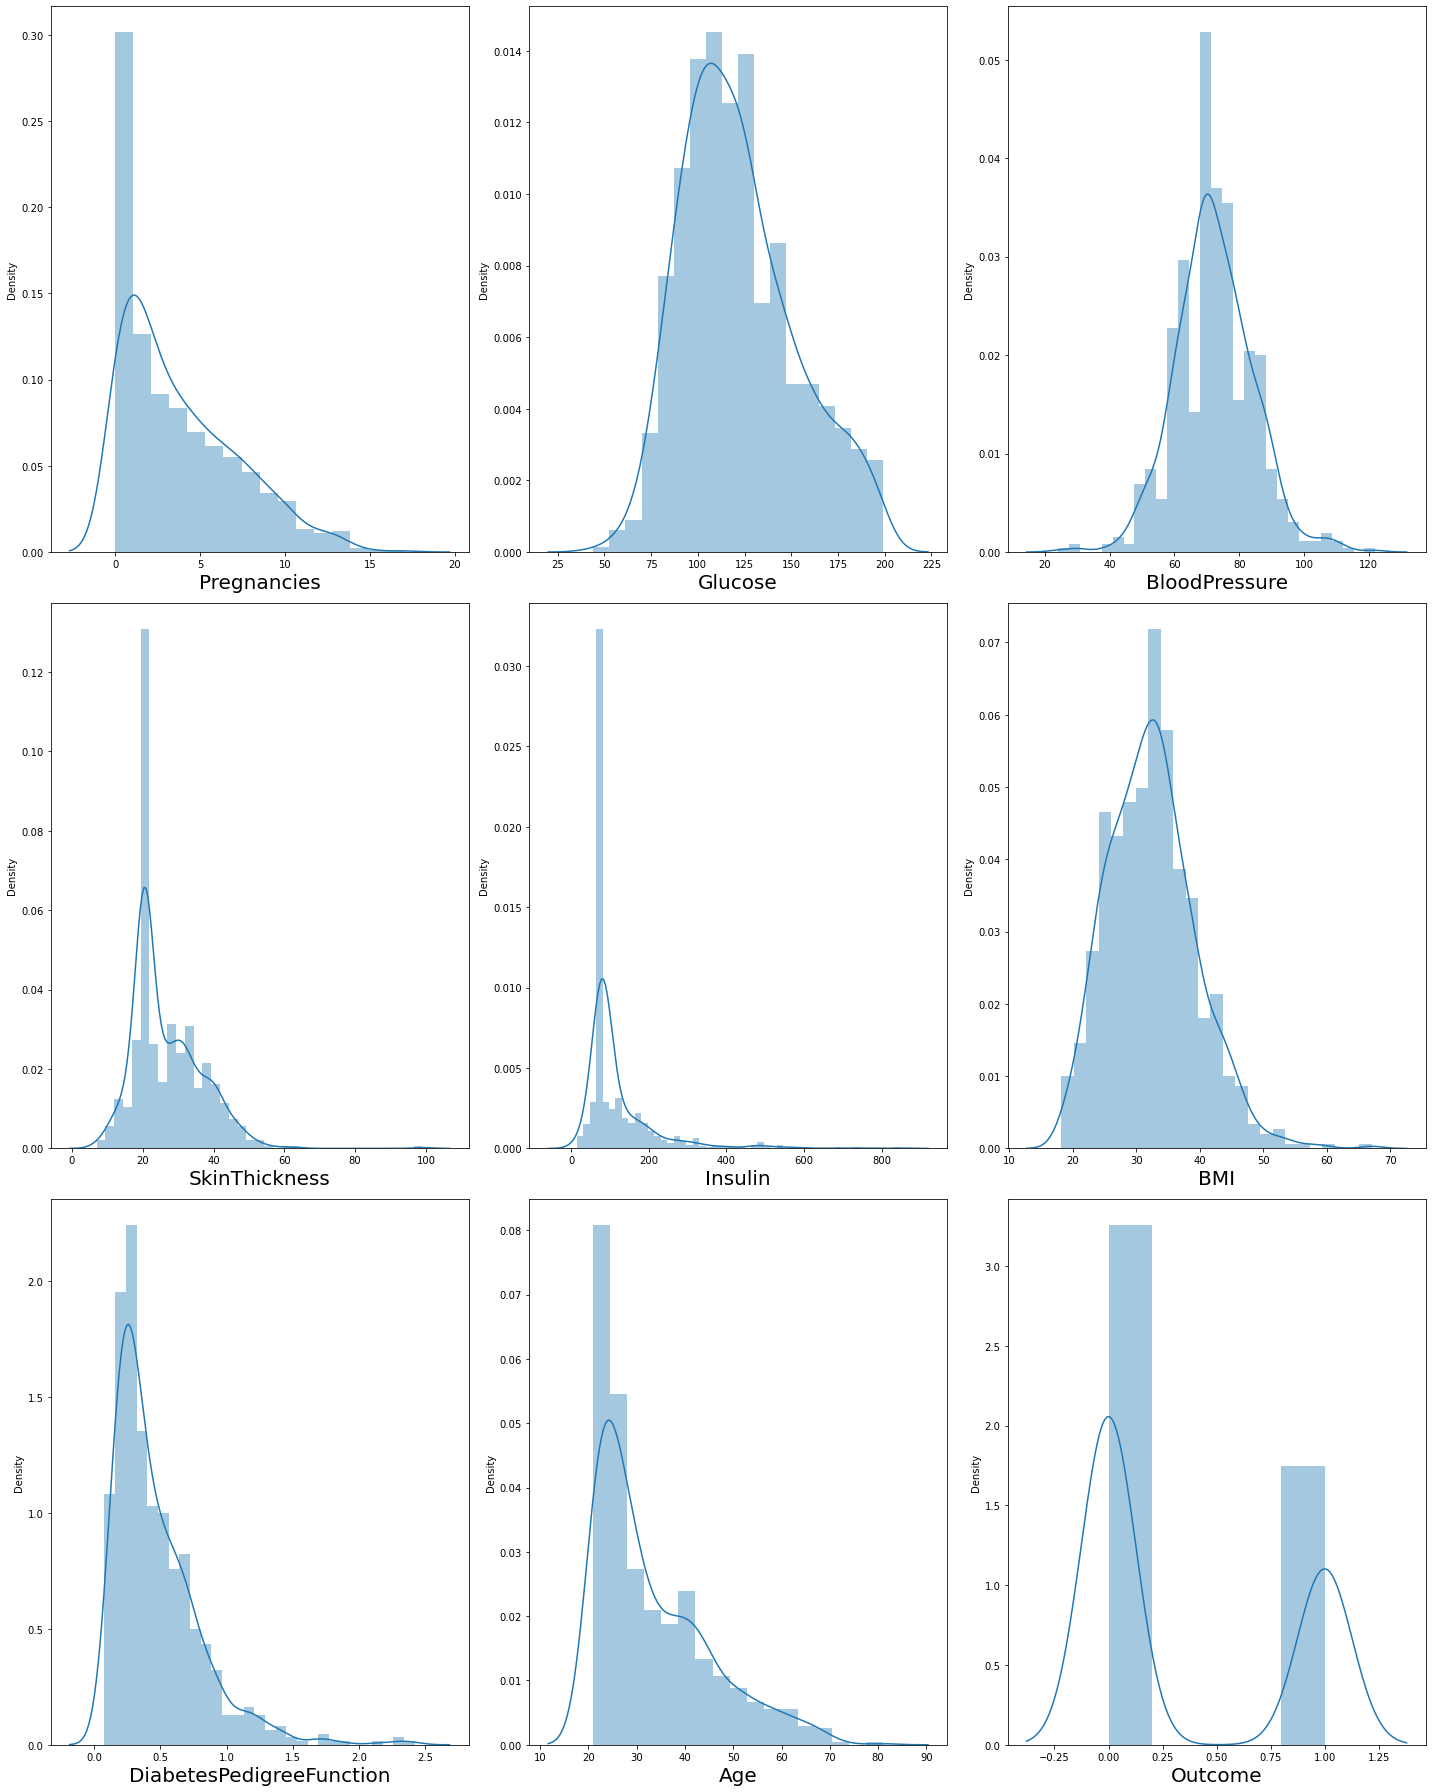

In [4]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# Apply log transformation on continous variables

Its primarily used to convert a skewed distribution to a normal distribution. In this transform, we take the log of the values in a column and use these values as column instead

In [5]:
data['Insulin'] = np.log(data['Insulin'])
data['BloodPressure'] = np.log(data['BloodPressure'])
data['SkinThickness'] = np.log(data['SkinThickness'])
data['BMI'] = np.log(data['BMI'])
data['DiabetesPedigreeFunction'] = np.log(data['DiabetesPedigreeFunction'])
data['Age'] = np.log(data['Age'])

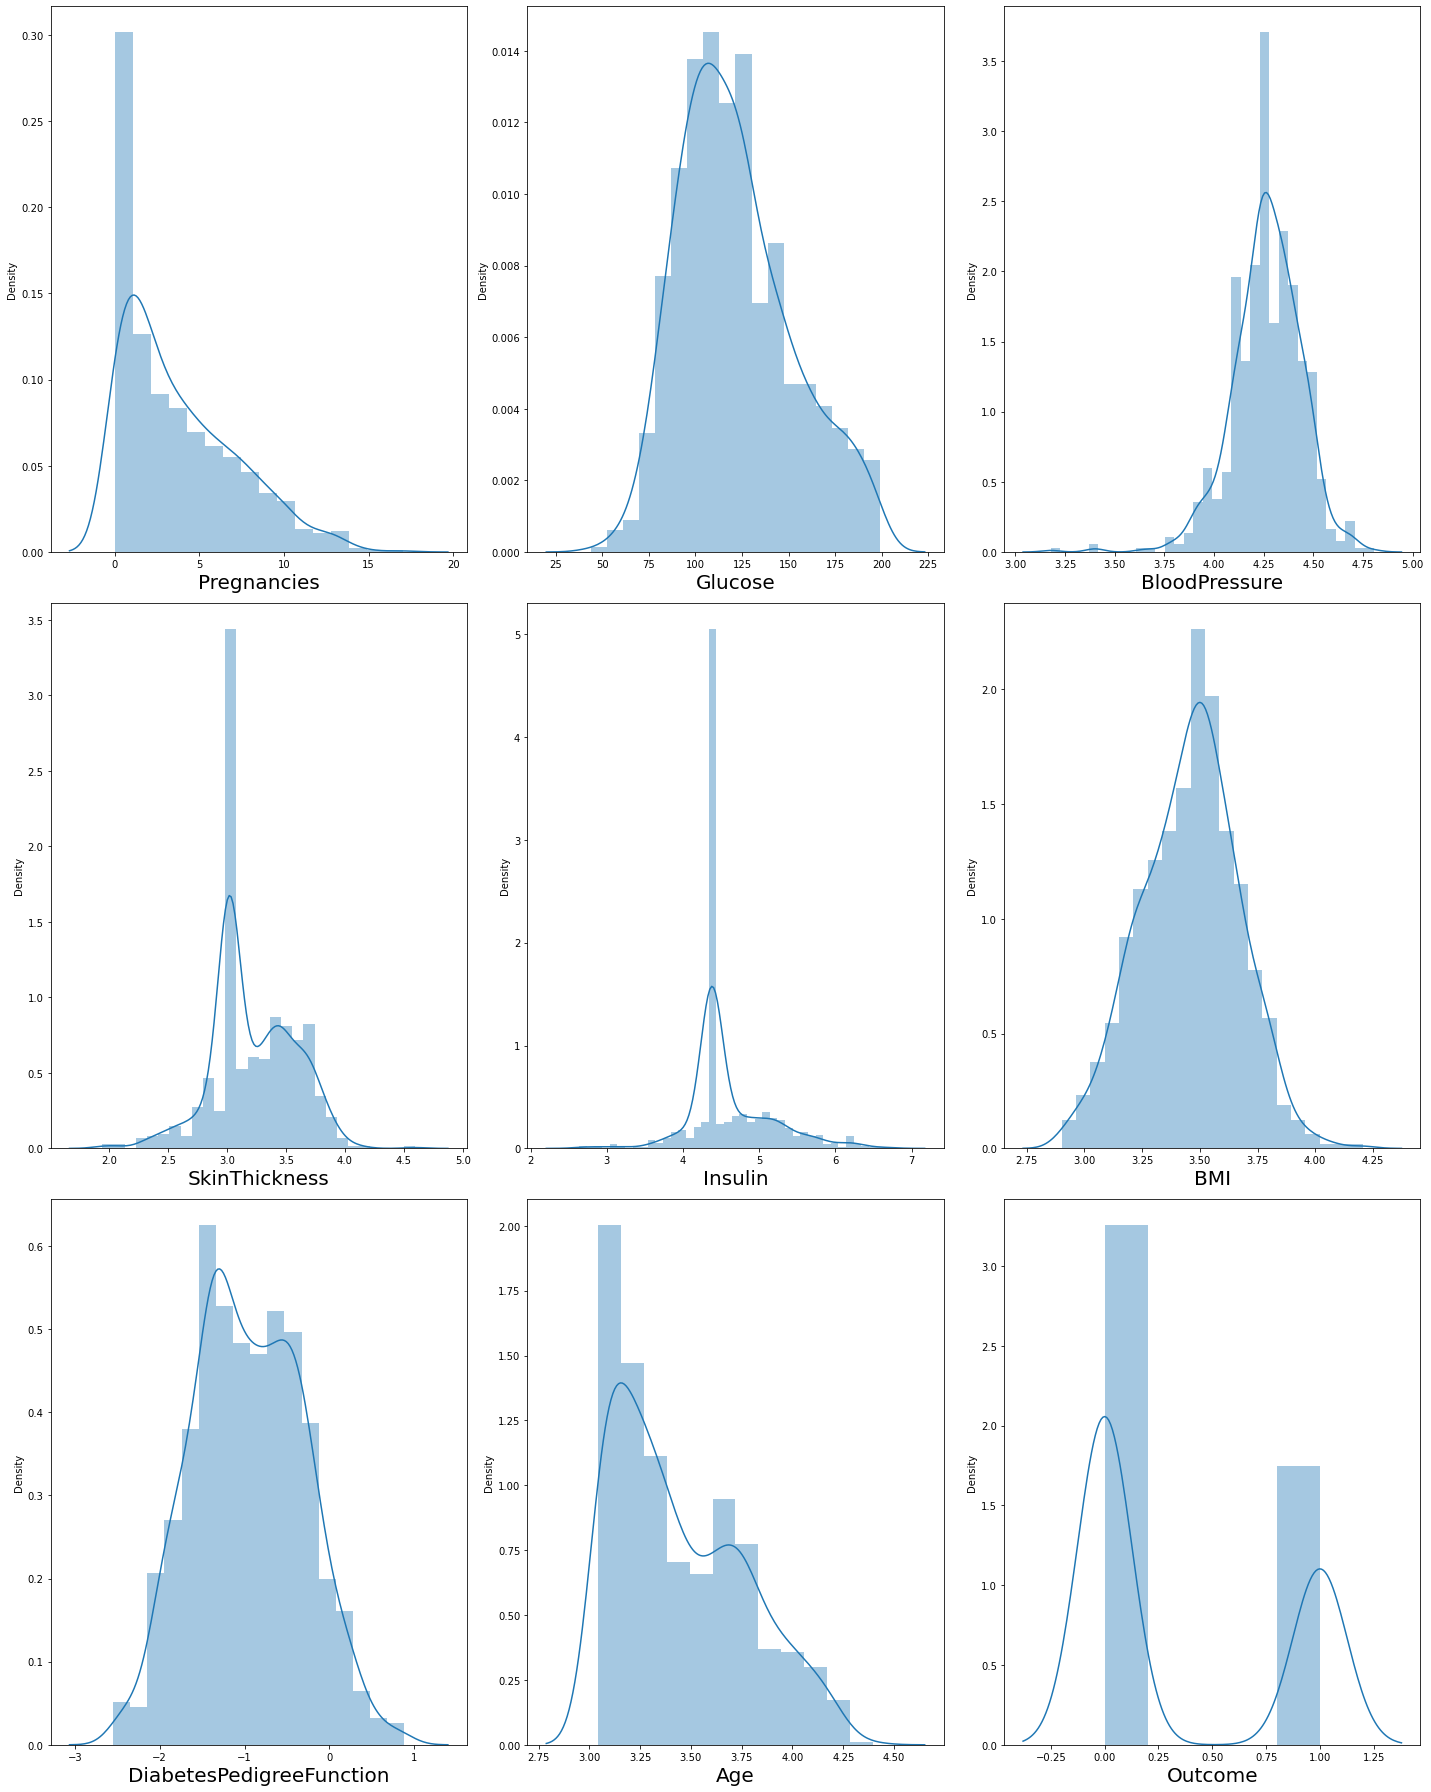

In [6]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# Power Transformation

Its used to stabilize the variance.

In [7]:
data = pd.read_csv('diabetes.csv')

data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())

In [8]:
features = ['Insulin', 'BMI', 'BloodPressure', 'SkinThickness', 'Age']

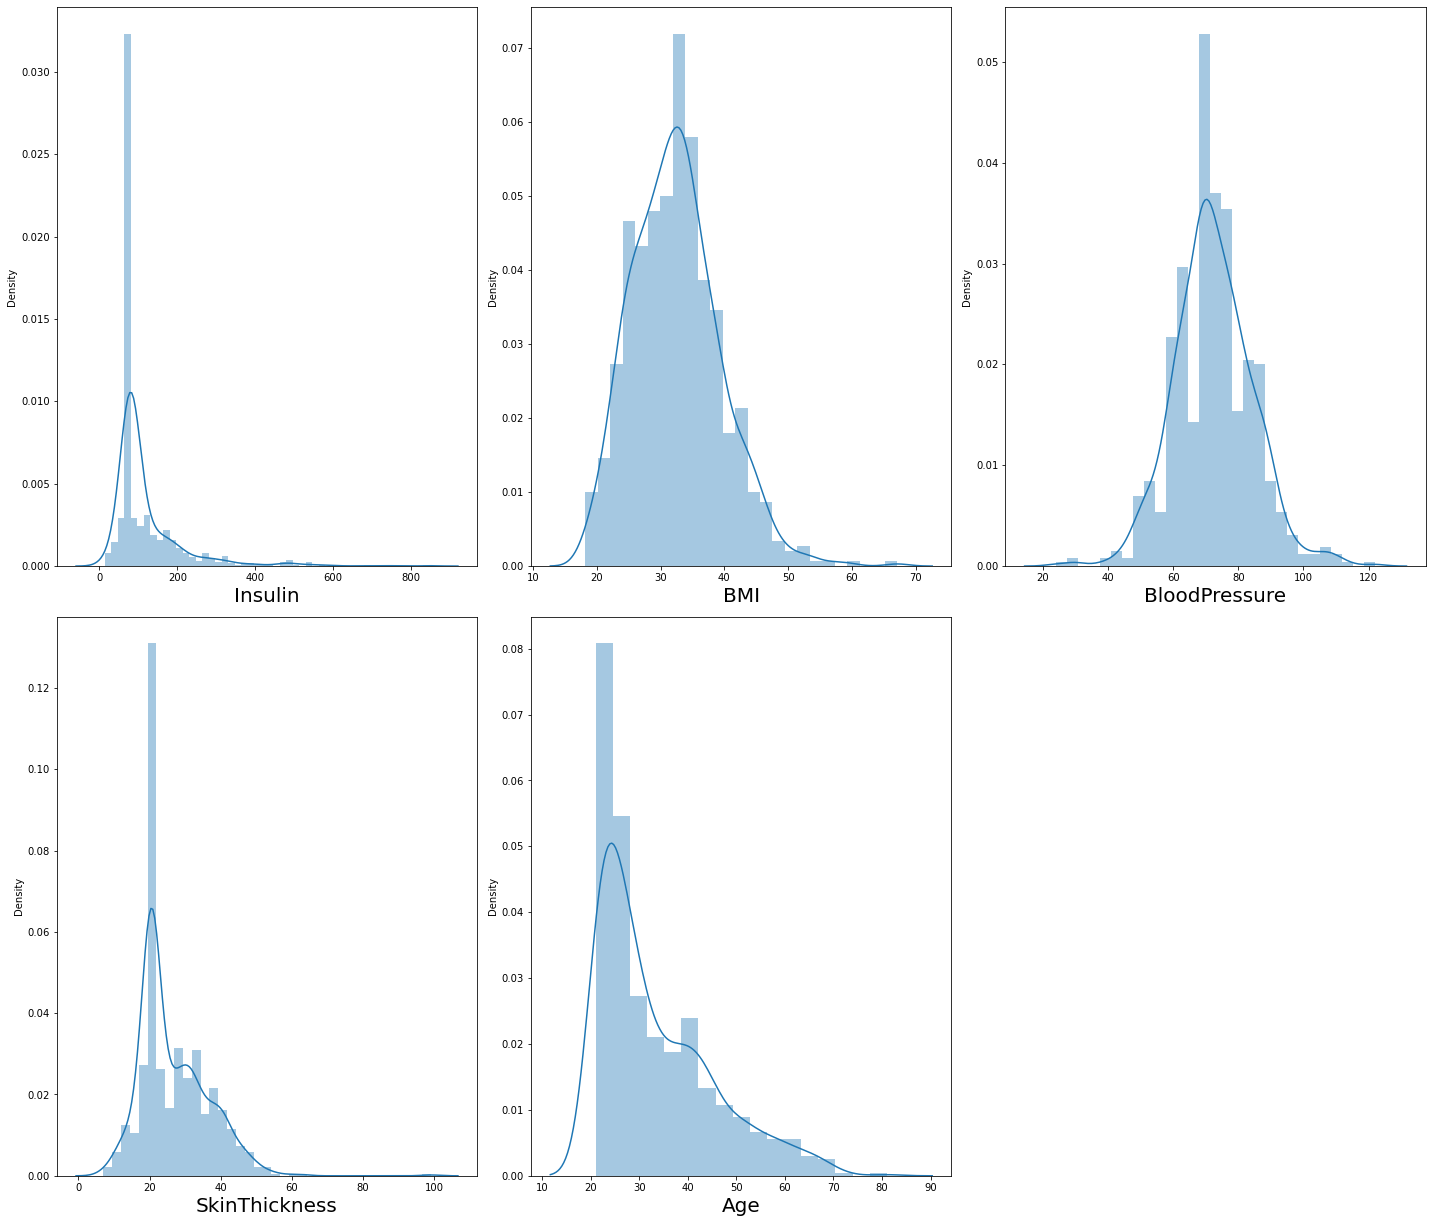

In [9]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

### Box cox works only with positive values ( > 0)
### Yeo Johnson works with both positive and negative values

In [10]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method = 'box-cox')

In [11]:
data[features] = scaler.fit_transform(data[features].values)

In [12]:
data[features]

,Insulin,BMI,BloodPressure,SkinThickness,Age
0,-0.350666,0.261508,-0.009147,0.956846,1.362797
1,-0.350666,-0.841776,-0.507220,0.415886,0.127990
2,-0.350666,-1.457249,-0.674630,-0.567991,0.231506
3,-0.025195,-0.584749,-0.507220,-0.246245,-1.483064
4,1.006677,1.462877,-2.750268,0.956846,0.328461
...,...,...,...,...,...
763,1.117625,0.161140,0.319657,1.873163,1.764261
764,-0.350666,0.697359,-0.174501,0.211217,-0.366775
765,0.305525,-0.912547,-0.009147,-0.246245,0.017237
766,-0.350666,-0.260838,-1.011681,-0.567991,1.236934


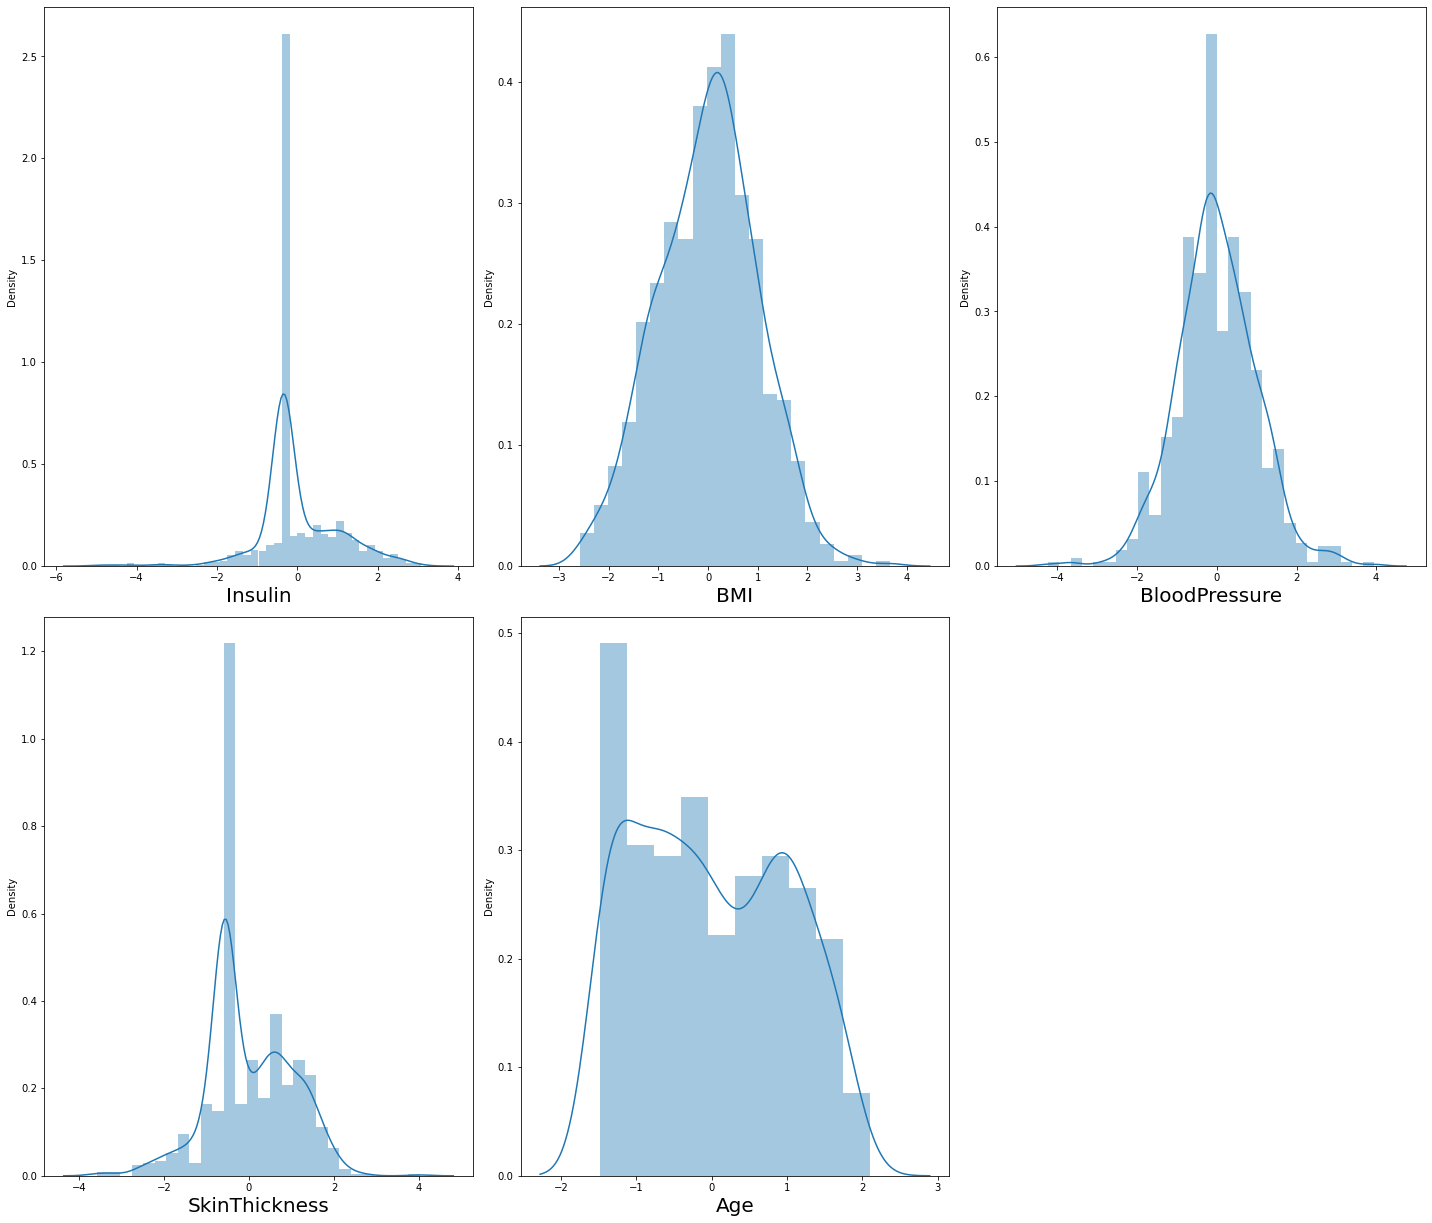

In [13]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()